In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

X = np.insert(np.loadtxt("./nuclear/nuclear_x.csv", delimiter=','), 0, 1, axis=1)
y = np.loadtxt("./nuclear/nuclear_y.csv")

lamda = 0.001
n = y.shape[0]
b = 1
w = np.array((0,1,1))

theta = w.copy()
theta[0] = b
np.random.seed(0)

In [2]:
def subgrad(X_batch, y_batch, theta):
    mask = (((X_batch @ theta) * y_batch) <= 1)
    vi = -(y_batch[mask, None] * X_batch[mask, :]).sum(0)
    w_hat = theta.copy()
    w_hat[0] = 0
    ui = (vi + lamda * w_hat) / (X.shape[0])
    g_batch = ui
    return g_batch

def fit(X, y, epochs=50, batch_size=None):
    n, d = X.shape
    theta = np.random.randn(d)

    theta_list = [theta.copy()]

    for epoch in tqdm(range(epochs),desc="Epochs of SGM" if batch_size==1 else "Epochs of GD"):
        indices = list(range(1, n))
        np.random.shuffle(indices)
        learning_rate = 100/(epoch + 1)

        for k in range(0, n, batch_size):
            batch_indices = indices[k*batch_size:(k+1)*batch_size]
            X_batch = X[batch_indices,:]
            y_batch = y[batch_indices]

            theta -= learning_rate * subgrad(X_batch, y_batch, theta)
            theta_list.append(theta.copy())
    return theta_list

In [3]:
def loss(X, y, theta_list):
    
    J_list = []
    for theta in tqdm(theta_list, desc="loss calc"):
        loss = np.maximum(1 - X @ theta * y, 0).mean()
        J_list.append(loss + lamda / 2 * np.linalg.norm(theta[:2]) ** 2)
    
    return J_list

In [4]:
theta_SGM = fit(X,y, epochs=50, batch_size=1)
theta_GD = fit(X,y, epochs=50, batch_size=X.shape[0])

Epochs of GD: 100%|██████████| 50/50 [00:01<00:00, 42.65it/s]


In [5]:
J_GD = loss(X, y, theta_GD)
J_SGM = loss(X, y, theta_SGM[::100])

loss calc: 100%|██████████| 10001/10001 [00:09<00:00, 1057.07it/s]


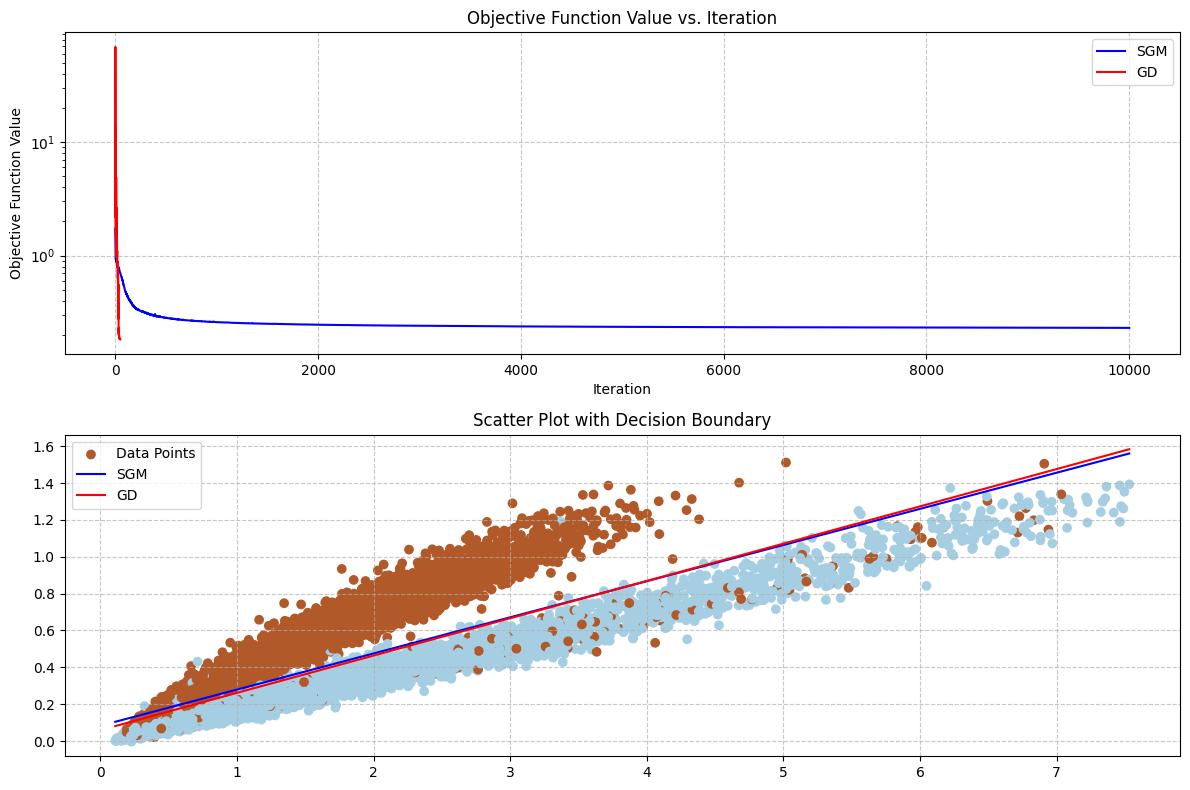

In [6]:
# Plotting the objective function value vs. iteration
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(J_SGM, label="SGM", color='blue')
plt.plot( J_GD, label="GD", color='red')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Objective Function Value vs. Iteration")
plt.yscale("log")  # Using a logarithmic scale for better visualization
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plotting the scatter plot with the learned linear decision boundary
plt.subplot(2, 1, 2)
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, label="Data Points")
plt.title("Scatter Plot with Decision Boundary")
x_decision_boundary = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_GD= (-theta_GD[-1][0] - theta_GD[-1][1] * x_decision_boundary) / theta_GD[-1][2]
y_SGM = (-theta_SGM[-1][0] - theta_SGM[-1][1] * x_decision_boundary) / theta_SGM[-1][2]

plt.plot(x_decision_boundary, y_SGM, label="SGM", color='blue')
plt.plot(x_decision_boundary, y_GD, label="GD", color='red')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### As it can be seen from the coding example, the SGM is more efficient than GD 